In [1]:
#Import important library
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from pandas import *
import matplotlib.pyplot as plt

In [2]:
#Read input file and understand the data
data = pd.read_csv("C:/Users/Thijol Johin/OneDrive/Desktop/MSc in Data Science/lfd proj/lfd dataset/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Text(0, 0.5, 'Count')

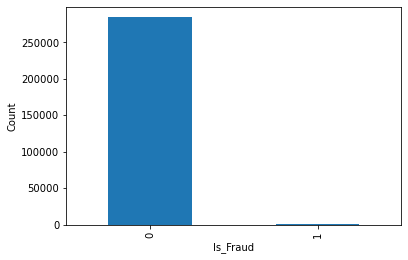

In [3]:
#counting the no of frauds and non-frauds
count_classes = pd.value_counts(data['Class'], sort = False)
count_classes.plot (kind='bar')

plt.xlabel ("Is_Fraud")
plt.ylabel ("Count")

Count between the no of frauds and no.of non-fraud

# since the count for fraud is very low we need to sample the data set.

In [4]:
#Sampling of the obtained data
from sklearn.preprocessing import StandardScaler
data['logAmount'] = np.log(data['Amount']+1)
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape (-1,1))
data = data.drop (['Time', 'Amount','logAmount'], axis = 1);

In [5]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
len(y[y.Class ==1]);

In [6]:
number_records_fraud = len (data[data.Class==1])
fraud_indices = np.array (data[data.Class==1].index)
normal_indices = np.array (data[data.Class==0].index)

In [7]:
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )
under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])

In [8]:
under_sample_data = data.iloc[under_sample_indices,:]
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'Class'];
y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'Class'];

In [9]:
#Splitting Train/Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)

# Decision Tree classifier model

In [10]:
#Decision Tree build
from sklearn.tree import DecisionTreeClassifier
classifier_model = DecisionTreeClassifier(random_state=1234)
#Random Split
cm_fit_1 = classifier_model.fit(X_train_under,y_train_under)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
preds_under = classifier_model.predict(X_test_under)
print(accuracy_score(y_test_under, preds_under))

0.902027027027027


# AdaBoost classifier model

In [12]:
#AdaBoost build
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_boost = ada_boost.fit(X_train_under, y_train_under)

In [13]:
preds_under = ada_boost.predict(X_test_under)
print(accuracy_score(y_test_under, preds_under))

0.9358108108108109


# Observation 
On comparing both the classifier models, we conclude that the AdaBoost Classifier model is providing better accuracy result.